# import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# read file

In [2]:
df=pd.read_csv('placement.csv')
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0



# check null values 

In [3]:
df.isnull().sum()

Student_ID    0
CGPA          0
IQ            0
Placement     0
dtype: int64

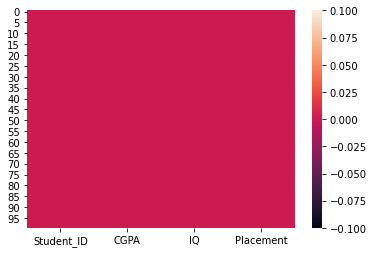

In [4]:
sns.heatmap(df.isnull())
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [6]:

df.describe()

,Student_ID,CGPA,IQ,Placement
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.991000,123.580000,0.500000
std,29.011492,1.143634,39.944198,0.502519
min,1.000000,3.300000,37.000000,0.000000
25%,25.750000,5.075000,101.500000,0.000000
50%,50.500000,6.000000,127.500000,0.500000
75%,75.250000,6.900000,149.000000,1.000000
max,100.000000,8.500000,233.000000,1.000000


# visualization

C:\Users\SA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


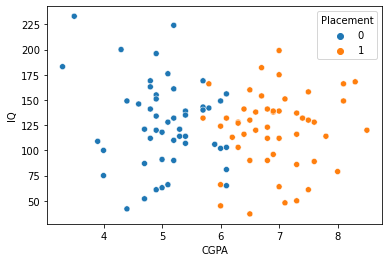

In [9]:

sns.scatterplot(df['CGPA'],df['IQ'],hue=df['Placement'])
plt.show()

In [10]:
# shape
df.shape

(100, 4)

In [12]:
print(df.index)
print(df.columns)

RangeIndex(start=0, stop=100, step=1)
Index(['Student_ID', 'CGPA', 'IQ', 'Placement'], dtype='object')


In [48]:
x=df.iloc[:,1:-1]
y=df.Placement

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [61]:
print(x.shape)
print(y.shape)

(100, 2)
(100,)


# import perceptron from scikit learn

In [62]:
from sklearn.linear_model import Perceptron
model=Perceptron()

In [63]:
model.fit(x_train,y_train)


Perceptron()

In [64]:
model.coef_

array([[338.7, -47. ]])

In [65]:
model.intercept_

array([6.])

# after train let's see

In [66]:
from mlxtend.plotting import plot_decision_regions

C:\Users\SA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


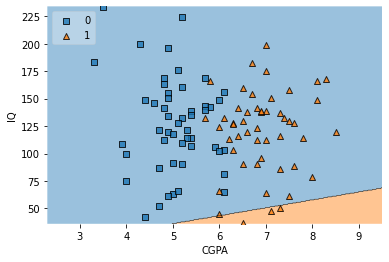

In [67]:
plot_decision_regions(x.values,y.values,clf=model,legend=2)
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.show()


In [69]:
pred=model.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(pred,y_test)

0.6333333333333333

# we can improve model performance by doing some changes